## Homework 2: Data Normalization and Data Points Distance Calculation

The Homework aims to use the Wine Quality Data Set to normalize the data and compute some basic distance calculations. Python 3.7.1 was used for this purpose.

The winequality-red.csv and winequality-white.csv files were downloaded [1], and the file winequality.names [2] containing the data set documentation was used to understand its contents and to identify the column labels.

The pandas [3], scikit learn[4] and Seaborn [5] documentation was used as a guide to solve the problems presented in Homework 1. Previously courses taken at DataCamp [6] were also helpful in solving the homework.

## Libraries used
- Pandas was imported to handle the Dataframes and to make the statistics calculations (mean, standard deviation, variance, skewness and mode).

- Scikit Learn: This is an open-source machine learning library for Python and contains a helpful preprocessing module that can help us do the normalization and standardization

- Seaborn was used to build the plots.

In [1]:
##--Importing necessary libraries
import pandas as pd 
from sklearn import preprocessing
from scipy.spatial import distance
import numpy as np
import seaborn as sns

## Loading the File
The dataset was inspected and it was noticed that it is stored as a comma separated values (csv) file and each value is separated by a semi-colon (;). The files contain a header with the column names. 

The file was taken directly from the dataset url and loaded as a pandas Dataframe with parameters for the header and the delimiter were specified to 0 and ";" respectively. The first 4 rows can be seen in the table below.

In [2]:
##--Reading the files

#Red from URL
file_red='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

#Read the red file
df_red = pd.read_csv(file_red, header = 0, delimiter = ";")

print(df_red.info())
df_red.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#White from URL
file_white='http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

#Read the white file
df_white = pd.read_csv(file_white, header = 0, delimiter = ";")

print(df_white.info())
df_white.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The datasets are related to red and white samples of the Portuguese "Vinho Verde" wine. They represent objective physicochemical test features of different red and white wines and the median of at least 3 sensory evaluations made by wine testers according to the dataset description. The features have varying ranges and the sensory evaluation has a range from 0 (very bad) to 10 (very excellent). 

The .info() method returns some information about the data set. It shows that the objective tests consist of 11 columns of attributes represented with float numbers, and also shows that the sensory evaluation is represented by integers. The red wine dataset is comprised of 1599 observations and the white wine dataset of 4898. None of the 12 columns have missing values.

## Standardization and Normalization
Standardization and normalization are processes in which the data is rescaled in order to fit a predetermined distribution or range. This process is useful for comparing measurements that have different scales or units and it is also required for many machine learning algorithms [7].

There exist many types of normalizations but this work focuses on three:
1. Min max normalization
2. Z-score normalization
3. Mean subtraction normalization

The normalizations will be performed in the red wine data set first and then in the one for the white wine. 

### Min max scaling
The min max scaling (also called “normalization”) targets to limit the range of the data to 0-1.

This normalization can be done using the function minmax = preprocessing.MinMaxScaler().fit_transform(df) as shown below. This function was found in [4]

In [4]:
#First ten values sliced
df_r_10 = df_red.iloc[:10,:]
df_w_10 = df_white.iloc[:10,:]

#This line can turn down efficiency but it will avoid a warning
df_r_10 = df_r_10.astype(float)

#Min-Max normalization

minmax_r = preprocessing.MinMaxScaler().fit_transform(df_r_10)

minmax_r = pd.DataFrame(minmax_r, columns=df_r_10.columns)
minmax_r

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.025641,0.700000,0.000000,0.142857,0.333333,0.125,0.190476,0.941176,1.000000,0.294118,0.000000,0.0
1,0.128205,1.000000,0.000000,0.285714,1.000000,1.000,0.583333,0.647059,0.114286,0.647059,0.363636,0.0
2,0.128205,0.800000,0.071429,0.224490,0.818182,0.375,0.428571,0.705882,0.285714,0.558824,0.363636,0.0
3,1.000000,0.000000,1.000000,0.142857,0.303030,0.500,0.500000,1.000000,0.000000,0.352941,0.363636,0.5
4,0.025641,0.700000,0.000000,0.142857,0.333333,0.125,0.190476,0.941176,1.000000,0.294118,0.000000,0.0
5,0.025641,0.633333,0.000000,0.122449,0.303030,0.250,0.261905,0.941176,1.000000,0.294118,0.000000,0.0
6,0.153846,0.533333,0.107143,0.081633,0.121212,0.375,0.488095,0.529412,0.400000,0.000000,0.000000,0.0
7,0.000000,0.616667,0.000000,0.000000,0.000000,0.375,0.035714,0.000000,0.657143,0.029412,0.545455,1.0
8,0.128205,0.500000,0.035714,0.163265,0.242424,0.000,0.000000,0.647059,0.571429,0.323529,0.090909,1.0
9,0.051282,0.366667,0.642857,1.000000,0.181818,0.500,1.000000,0.941176,0.542857,1.000000,1.000000,0.0


In [5]:
print("Max-Min Dataframe description")
pd.DataFrame(minmax_r.describe(percentiles=[0.5])).round(3)

Max-Min Dataframe description


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,0.167,0.585,0.186,0.231,0.364,0.362,0.368,0.729,0.557,0.379,0.273,0.250
std,0.298,0.268,0.347,0.281,0.309,0.279,0.298,0.305,0.366,0.295,0.326,0.425
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.090,0.625,0.018,0.143,0.303,0.375,0.345,0.824,0.557,0.309,0.227,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


The min max normalization has scaled all the data to an interval from 0 to 1 in a column wise fashion. It can be observed in the Dataframe’s description that the minimum and maximum value for every column is 0 and 1, respectively. It can also be noticed that every column has a different mean and standard deviation, something that will not occur with the following normalization.

### Z-score normalization
Also called standardization, it scales data to fit a normal distribution with a mean of 0 and a standard deviation of 1. This normalization can be done using the function z = preprocessing.StandardScaler().fit_transform(df), as shown below.

In [6]:
#z-score normalization
z = preprocessing.StandardScaler().fit_transform(df_r_10)
z = pd.DataFrame(z, columns=df_r_10.columns)
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.498662,0.451753,-0.563489,-0.329398,-0.103362,-0.896665,-0.626576,0.731200,1.276466,-0.305196,-0.880830,-0.620174
1,-0.135999,1.630239,-0.563489,0.206831,2.170608,2.406839,0.761143,-0.284356,-1.276466,0.957683,0.293610,-0.620174
2,-0.135999,0.844582,-0.346763,-0.022981,1.550434,0.047193,0.214466,-0.081244,-0.782350,0.641963,0.293610,-0.620174
3,2.946642,-2.298048,2.470683,-0.329398,-0.206725,0.519122,0.466778,0.934311,-1.605877,-0.094716,0.293610,0.620174
4,-0.498662,0.451753,-0.563489,-0.329398,-0.103362,-0.896665,-0.626576,0.731200,1.276466,-0.305196,-0.880830,-0.620174
5,-0.498662,0.189867,-0.563489,-0.406002,-0.206725,-0.424736,-0.374264,0.731200,1.276466,-0.305196,-0.880830,-0.620174
6,-0.045333,-0.202961,-0.238399,-0.559211,-0.826898,0.047193,0.424726,-0.690578,-0.452940,-1.357594,-0.880830,-0.620174
7,-0.589328,0.124396,-0.563489,-0.865627,-1.240347,0.047193,-1.173253,-2.518578,0.288234,-1.252354,0.880830,1.860521
8,-0.135999,-0.333904,-0.455126,-0.252794,-0.413449,-1.368595,-1.299409,-0.284356,0.041176,-0.199956,-0.587220,1.860521
9,-0.407997,-0.857676,1.387050,2.887978,-0.620174,0.519122,2.232966,0.731200,-0.041176,2.220561,2.348881,-0.620174


In [7]:
print("Z-score Dataframe description")
pd.DataFrame(z.describe(percentiles=[0.5])).round(2)

Z-score Dataframe description


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05,1.05
min,-0.59,-2.30,-0.56,-0.87,-1.24,-1.37,-1.30,-2.52,-1.61,-1.36,-0.88,-0.62
50%,-0.27,0.16,-0.51,-0.33,-0.21,0.05,-0.08,0.32,0.00,-0.25,-0.15,-0.62
max,2.95,1.63,2.47,2.89,2.17,2.41,2.23,0.93,1.28,2.22,2.35,1.86


The z-score normalization has scaled all data to fit a normal distribution. It can be observed in the table that all columns have a mean of 0 and a standard deviation of approximately 1.
### Mean Subtraction Normalization
This type of normalization subtracts the mean to each element column wise and thus makes the mean approach 0. This normalization can be done using the standard scaler but forcing it to use std=0 as shown below [8].

In [8]:
#Mean Subtraction Normalization
mean_s_fitter = preprocessing.StandardScaler(with_std=False)
mean_s = mean_s_fitter.fit_transform(df_r_10)
mean_s = pd.DataFrame(mean_s, columns=df_r_10.columns)
mean_s

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.55,0.069,-0.104,-0.43,-0.001,-3.8,-14.9,0.00072,0.155,-0.029,-0.3,-0.5
1,-0.15,0.249,-0.104,0.27,0.021,10.2,18.1,-0.00028,-0.155,0.091,0.1,-0.5
2,-0.15,0.129,-0.064,-0.03,0.015,0.2,5.1,-0.00008,-0.095,0.061,0.1,-0.5
3,3.25,-0.351,0.456,-0.43,-0.002,2.2,11.1,0.00092,-0.195,-0.009,0.1,0.5
4,-0.55,0.069,-0.104,-0.43,-0.001,-3.8,-14.9,0.00072,0.155,-0.029,-0.3,-0.5
5,-0.55,0.029,-0.104,-0.53,-0.002,-1.8,-8.9,0.00072,0.155,-0.029,-0.3,-0.5
6,-0.05,-0.031,-0.044,-0.73,-0.008,0.2,10.1,-0.00068,-0.055,-0.129,-0.3,-0.5
7,-0.65,0.019,-0.104,-1.13,-0.012,0.2,-27.9,-0.00248,0.035,-0.119,0.3,1.5
8,-0.15,-0.051,-0.084,-0.33,-0.004,-5.8,-30.9,-0.00028,0.005,-0.019,-0.2,1.5
9,-0.45,-0.131,0.256,3.77,-0.006,2.2,53.1,0.00072,-0.005,0.211,0.8,-0.5


In [9]:
print("Mean Subtraction Dataframe description")
pd.DataFrame(mean_s.describe(percentiles=[0.5])).round(2)

Mean Subtraction Dataframe description


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.0,10.00,10.00,10.00,10.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.0,0.00,0.00,0.00,0.00
std,1.16,0.16,0.19,1.38,0.01,4.47,25.07,0.0,0.13,0.10,0.36,0.85
min,-0.65,-0.35,-0.10,-1.13,-0.01,-5.80,-30.90,-0.0,-0.19,-0.13,-0.30,-0.50
50%,-0.30,0.02,-0.09,-0.43,-0.00,0.20,-1.90,0.0,0.00,-0.02,-0.05,-0.50
max,3.25,0.25,0.46,3.77,0.02,10.20,53.10,0.0,0.16,0.21,0.80,1.50


The mean subtraction normalization has scaled the data and now the mean of every column is approximately 0. 
### White Wine Normalization
The analysis of the white wine data set is very similar to the one of the red wine except for one difference that will be discussed next. First, the min max scaling is shown.


In [10]:
#First ten values sliced
df_w_10 = df_white.iloc[:10,:]

#This line can turn down efficiency but it will avoid a warning
df_w_10 = df_w_10.astype(float)

#Min-Max normalization

minmax = preprocessing.MinMaxScaler().fit_transform(df_w_10)

minmax = pd.DataFrame(minmax, columns=df_w_10.columns)
minmax

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.421053,0.5,0.740741,1.000000,0.071429,0.939394,0.820225,1.000000,0.000000,0.555556,0.000000,0.0
1,0.052632,0.8,0.666667,0.005208,0.357143,0.000000,0.393258,0.027778,1.000000,1.000000,0.318182,0.0
2,1.000000,0.6,0.888889,0.281250,0.428571,0.484848,0.000000,0.180556,0.866667,0.444444,0.590909,0.0
3,0.526316,0.1,0.592593,0.364583,1.000000,1.000000,1.000000,0.250000,0.633333,0.000000,0.500000,0.0
4,0.526316,0.1,0.592593,0.364583,1.000000,1.000000,1.000000,0.250000,0.633333,0.000000,0.500000,0.0
5,1.000000,0.6,0.888889,0.281250,0.428571,0.484848,0.000000,0.180556,0.866667,0.444444,0.590909,0.0
6,0.000000,1.0,0.000000,0.286458,0.071429,0.484848,0.438202,0.152778,0.600000,0.777778,0.363636,0.0
7,0.421053,0.5,0.740741,1.000000,0.071429,0.939394,0.820225,1.000000,0.000000,0.555556,0.000000,0.0
8,0.052632,0.8,0.666667,0.005208,0.357143,0.000000,0.393258,0.027778,1.000000,1.000000,0.318182,0.0
9,1.000000,0.0,1.000000,0.000000,0.000000,0.424242,0.359551,0.000000,0.733333,0.555556,1.000000,0.0


In [11]:
print("Max-Min Dataframe description")
pd.DataFrame(minmax.describe(percentiles=[0.5])).round(3)

Max-Min Dataframe description


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.0
mean,0.500,0.500,0.678,0.359,0.379,0.576,0.522,0.307,0.633,0.533,0.418,0.0
std,0.396,0.337,0.274,0.368,0.366,0.385,0.372,0.376,0.364,0.347,0.295,0.0
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
50%,0.474,0.550,0.704,0.284,0.357,0.485,0.416,0.181,0.683,0.556,0.432,0.0
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.0


The behavior of the white wine data set is similar to the one from the red wine. It can be observed that with the min max normalization, the minimum and maximum of almost all the columns are 0 and 1 respectively. However, the last column ("Quality") appears as an all-zero column. This is due to the fact that all the original values of this column were the same (6) so the normalization fails to work with a mean=6 and a standard deviation = 0. This will also be the case with the z-score and the mean subtraction normalization as shown below.

In [12]:
#z-score normalization
zw = preprocessing.StandardScaler().fit_transform(df_w_10)
zw = pd.DataFrame(zw, columns=df_r_10.columns)
zw.iloc[:,-4:]

,pH,sulphates,alcohol,quality
0,-1.835085,0.067574,-1.493223,0.0
1,1.062418,1.419048,-0.357075,0.0
2,0.676084,-0.270295,0.616766,0.0
3,0.000000,-1.621770,0.292152,0.0
4,0.000000,-1.621770,0.292152,0.0
5,0.676084,-0.270295,0.616766,0.0
6,-0.096583,0.743311,-0.194768,0.0
7,-1.835085,0.067574,-1.493223,0.0
8,1.062418,1.419048,-0.357075,0.0
9,0.289750,0.067574,2.077528,0.0


In [13]:
print("Z-score Dataframe description")
pd.DataFrame(zw.describe(percentiles=[0.5]).iloc[:,-4:]).round(2)

Z-score Dataframe description


,pH,sulphates,alcohol,quality
count,10.00,10.00,10.00,10.0
mean,-0.00,-0.00,0.00,0.0
std,1.05,1.05,1.05,0.0
min,-1.84,-1.62,-1.49,0.0
50%,0.14,0.07,0.05,0.0
max,1.06,1.42,2.08,0.0


In [14]:
#Mean Subtraction Normalization
mean_s_fitter = preprocessing.StandardScaler(with_std=False)
mean_sw = mean_s_fitter.fit_transform(df_w_10)
mean_sw = pd.DataFrame(mean_sw, columns=df_w_10.columns)
mean_sw.iloc[:,-4:]

,pH,sulphates,alcohol,quality
0,-0.19,0.002,-0.92,0.0
1,0.11,0.042,-0.22,0.0
2,0.07,-0.008,0.38,0.0
3,0.00,-0.048,0.18,0.0
4,0.00,-0.048,0.18,0.0
5,0.07,-0.008,0.38,0.0
6,-0.01,0.022,-0.12,0.0
7,-0.19,0.002,-0.92,0.0
8,0.11,0.042,-0.22,0.0
9,0.03,0.002,1.28,0.0


In [15]:
print("Mean Subtraction Dataframe description")
pd.DataFrame(mean_sw.describe(percentiles=[0.5]).iloc[:,-4:]).round(2)

Mean Subtraction Dataframe description


,pH,sulphates,alcohol,quality
count,10.00,10.00,10.00,10.0
mean,0.00,-0.00,0.00,0.0
std,0.11,0.03,0.65,0.0
min,-0.19,-0.05,-0.92,0.0
50%,0.02,0.00,0.03,0.0
max,0.11,0.04,1.28,0.0


## Distances
The distance between two points in an n-dimensional array is a good way of comparing how similar or different these two points might be. There are many ways to measure this proximity: By measuring the dimension by dimension difference, measuring the angle the two vectors create or a measure of statistical dependencies for example. In this document the Manhattan, Euclidean and Cosine distances are explored.

The documentation for the function used can be found on [4].

The strategy used to find the closest point was inspired by the comment for another problem found in [8].
### Manhattan Distance
This distance calculation technique presumes that the distance has to be calculated as the sum of straight, perpendicular horizontal or vertical lines between the two points. 

This distance can be calculated using the function: result = distance.pdist(df,  metric='cityblock').

In [16]:
###Manhattan distance
dis = minmax
dis_manhattan = distance.pdist(minmax,  metric='cityblock')
dis_manhattan = pd.DataFrame(distance.squareform(dis_manhattan))
dis_manhattan

,0,1,2,3,4,5,6,7,8,9
0,0.000000,6.124210,5.565890,4.896670,4.896670,5.565890,5.244984,0.000000,6.124210,6.118794
1,6.124210,0.000000,3.709562,5.627439,5.627439,3.709562,2.808732,6.124210,0.000000,4.321710
2,5.565890,3.709562,0.000000,4.278025,4.278025,0.000000,3.944493,5.565890,3.709562,2.675180
3,4.896670,5.627439,4.278025,0.000000,0.000000,4.278025,5.147251,4.896670,5.627439,4.967438
4,4.896670,5.627439,4.278025,0.000000,0.000000,4.278025,5.147251,4.896670,5.627439,4.967438
5,5.565890,3.709562,0.000000,4.278025,4.278025,0.000000,3.944493,5.565890,3.709562,2.675180
6,5.244984,2.808732,3.944493,5.147251,5.147251,3.944493,0.000000,5.244984,2.808732,4.641842
7,0.000000,6.124210,5.565890,4.896670,4.896670,5.565890,5.244984,0.000000,6.124210,6.118794
8,6.124210,0.000000,3.709562,5.627439,5.627439,3.709562,2.808732,6.124210,0.000000,4.321710
9,6.118794,4.321710,2.675180,4.967438,4.967438,2.675180,4.641842,6.118794,4.321710,0.000000


In [17]:
#Getting the nearest and farthest points
dis_max= pd.DataFrame(dis_manhattan.idxmax())
dis_min = pd.DataFrame(dis_manhattan.apply(lambda x: x.sort_values(ascending=True).index.to_series().iloc[1], axis=1))
dis_man = pd.concat([dis_min, dis_max], axis=1)
dis_man.columns =("closest", "farthest")
dis_man

,closest,farthest
0,7,1
1,8,0
2,5,0
3,4,1
4,4,1
5,5,0
6,1,0
7,7,1
8,8,0
9,2,0


### Euclidean Distance
The Euclidean distance sees the two points separation as a triangle with two cathetus (vertical and horizontal lines) and the hypothenuse. The Euclidean Distance calculates the hypothenuse as the distance between the points.

This distance can be found with the function: result = distance.pdist(df,  metric='euclidean')

In [18]:
###Euclidean distance
dis = minmax
dis_euclidean = distance.pdist(minmax,  metric='euclidean')
dis_euclidean = pd.DataFrame(distance.squareform(dis_euclidean))

dis_max= pd.DataFrame(dis_euclidean.idxmax())
dis_min = pd.DataFrame(dis_euclidean.apply(lambda x: x.sort_values(ascending=True).index.to_series().iloc[1], axis=1))
dis_euc = pd.concat([dis_min, dis_max], axis=1)
dis_euc.columns =("closest", "farthest")
dis_euc

,closest,farthest
0,7,9
1,8,0
2,5,0
3,4,1
4,4,1
5,5,0
6,1,9
7,7,9
8,8,0
9,2,0


It can be noticed that the results with the Manhattan and Euclidean distance are very similar, only differing in 3 outputs. This is because both of them are based on the spatial distance and the magnitude of the vector has an effect on them.
### Cosine Distance
The Cosine distance calculates the angle generated by the two vectors that are being evaluated. In this case the magnitude of the vector does not affect the final result.

The cosine distance can be calculated with the function: result = distance.pdist(df,  metric='cosine')

In [19]:
###Cosine distance
dis = minmax
dis_cosine = distance.pdist(minmax,  metric='cosine')
dis_cosine = pd.DataFrame(distance.squareform(dis_cosine))

dis_max= pd.DataFrame(dis_cosine.idxmax())
dis_min = pd.DataFrame(dis_cosine.apply(lambda x: x.sort_values(ascending=True).index.to_series().iloc[1], axis=1))
dis_cos = pd.concat([dis_min, dis_max], axis=1)
dis_cos.columns =("closest", "farthest")
dis_cos

,closest,farthest
0,7,1
1,8,0
2,5,0
3,4,1
4,3,1
5,2,0
6,1,9
7,7,1
8,8,0
9,2,0


In [20]:
dis_total = pd.concat([dis_man, dis_euc, dis_cos], axis=1, keys=["Manhattan", "Euclidean", "Cosine"])
dis_total

Manhattan          Euclidean           Cosine         
    closest farthest   closest farthest closest farthest
0         7        1         7        9       7        1
1         8        0         8        0       8        0
2         5        0         5        0       5        0
3         4        1         4        1       4        1
4         4        1         4        1       3        1
5         5        0         5        0       2        0
6         1        0         1        9       1        9
7         7        1         7        9       7        1
8         8        0         8        0       8        0
9         2        0         2        0       2        0

## Plotting
Plotting a dataframe is a good strategy to visually inspect the relationship between variables. In the present case of study this might seem troublesome due to the large number of dimensions being analyzed. In cases like this, the function sns.pairplot(df) is helpful because it plots each dimension against one another.

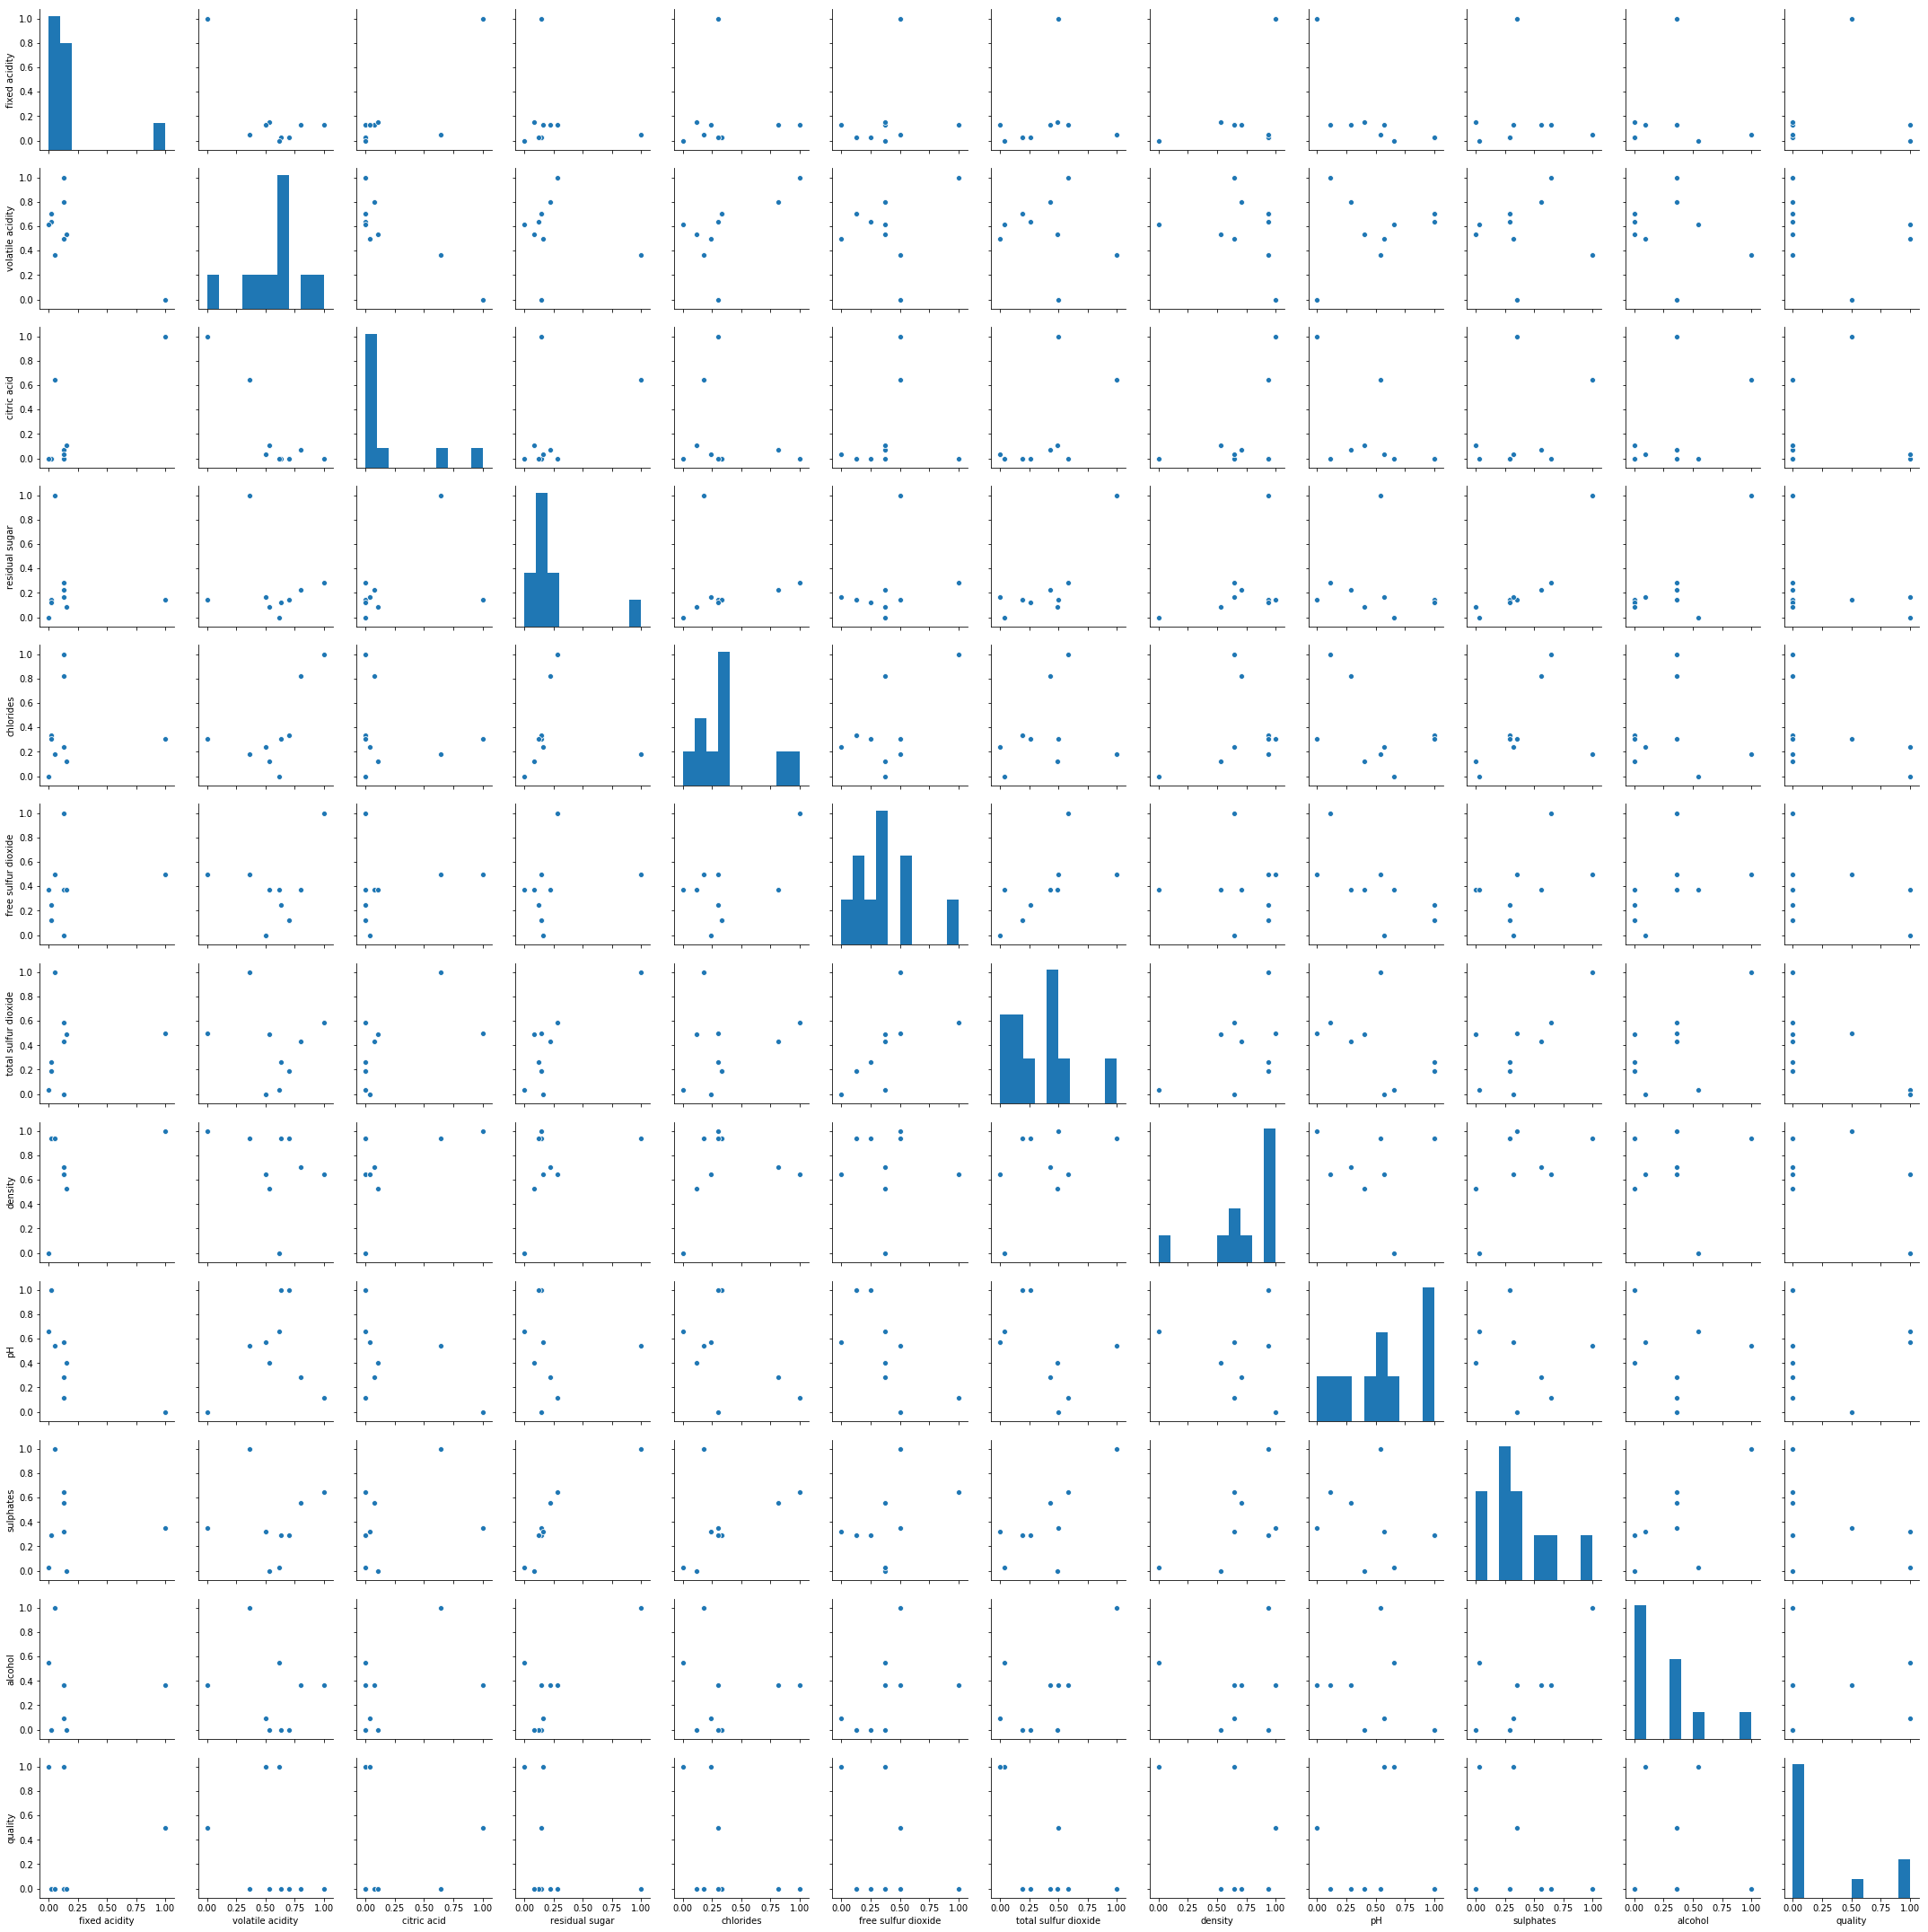

In [21]:
# Create the pairplot
sns.pairplot(minmax_r)

## Bibliography
[1] 	University of California, Irvine, "UCI Machine Learning Repository: Wine Quality) Data Set," [Online]. Available: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/. [Accessed 15 01 2019].

[2] 	University of California, Irvine, "UCI Machine Learning Repository:Wine Quality Data Set Documentation," [Online]. Available: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names. [Accessed 09 January 2019].

[3] 	W. McKinney, "pandas: powerful Python data analysis toolkit," 06 08 2018. [Online]. Available: http://pandas.pydata.org/pandas-docs/stable/. [Accessed 09 January 2019].

[4] 	F. Pedregosa, G. Varoquaux, A. Gramfort, V. Michel, B. Thirion, O. Grisel, M. Blondel, P. Prettenhofer, R. Weiss, V. Dubourg, V, J. erplas, A. Passos, D. Cournapeau, M. Brucher, M. Perrot and E. Duchesnay, "Scikit-learn: Machine Learning in Python," Journal of Machine Learning Research, vol. 12, pp. 2825-2830, 2011. 

[5] 	M. Waskorn, "seaborn: statistical data visualization - seaborn 0.9.0 documentation," [Online]. Available: http://seaborn.pydata.org/#. [Accessed 15 01 2019].

[6] 	Datacamp, "Data Scientist with Python Track | DataCamp," [Online]. Available: https://www.datacamp.com/tracks/data-scientist-with-python. [Accessed 09 01 2019].

[7] 	S. Raschka, "About Feature Scaling and Normalization," 11 07 2014. [Online]. Available: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization. [Accessed 15 01 2019].

[8] 	@Languitar, "Stackoverflow: Python - Select column of pandas dataframe based on value," Stack Overflow, 3 04 2017. [Online]. Available: https://stackoverflow.com/questions/43181583/select-column-of-pandas-dataframe-based-on-value. [Accessed 15 01 2019].

[9] 	W. Koehrsen, "Visualizin Data with Pair Plots in Python," Towards Data Science, 06 04 2018. [Online]. Available: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166. [Accessed 15 01 2019].

